In [24]:
import pandas as pd
#from mcrforest.forest import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score


# expand head function
pd.set_option('display.max_columns', None)

#load in full data set
df = pd.read_csv('df_anal_03.csv', encoding = "latin", error_bad_lines = False, low_memory=False,)
#df = df.drop("Unnamed: 0",axis=1)


#### STEP 1 - FINAL STAGES OF DATA PREPARATION FOR ANALYSIS ####
# Extract features and labels
labels = df['risk_category_code_binary']
features = df.drop('risk_category_code_binary', axis = 1)
labels = labels.replace([2], [1])


# Convert to numpy arrays
import numpy as np
X = features
y = labels

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


In [14]:
params = {'max_depth': 30, 'max_features': 'auto', 'n_estimators': 12*5, 'n_jobs': -1}
print(f'Refitting with best params: {params}')
model = RandomForestClassifier( **params )

Refitting with best params: {'max_depth': 30, 'max_features': 'auto', 'n_estimators': 60, 'n_jobs': -1}


In [15]:
print('Doing the RF fit')
model.fit(X,y)


Doing the RF fit


RandomForestClassifier(max_depth=30, n_estimators=60, n_jobs=-1)

In [17]:
X.columns.tolist()

['mun_code',
 'cod_stt',
 'cod_rgn',
 'area',
 'perimtr',
 'num_sectors',
 'indigenous_cover',
 'biome_cover_amazon',
 'biome_cover_caatinga',
 'biome_cover_cerrado',
 'biome_cover_mata_atlantica',
 'biome_cover_pampa',
 'biome_cover_pantanal',
 'biome_cover_sistema_costeira',
 'Total_pop',
 'Pop_Urban',
 'Pop_Rural',
 'Pop_Men',
 'Pop_Women',
 'Pop_Density',
 'age_prop_18_to_23',
 'age_prop_24_to_28',
 'age_prop_29_to_33',
 'age_prop_34_to_38',
 'age_prop_39_to_43',
 'age_prop_44_to_48',
 'age_prop_49_to_53',
 'age_prop_54_to_58',
 'age_prop_59_to_65',
 'age_prop_above_65',
 'bolsa_prop_true',
 'favela_true',
 'gender_prop_f',
 'gender_prop_i',
 'gender_prop_m',
 'health_insur_true',
 'mc_profile_prop_empreendedores',
 'mc_profile_prop_experientes',
 'mc_profile_prop_promissores',
 'mc_profile_prop_unknown',
 'middle_class',
 'public_sector',
 'residents_prop_1',
 'residents_prop_2',
 'residents_prop_3',
 'residents_prop_4',
 'residents_prop_5',
 'residents_prop_6.',
 'residents_prop_

In [20]:
non_groups = ['public_sector', 'health_insur_true', 'Total_pop', 'area', 'smartphone', 'perimtr', 'bolsa_prop_true', 'Pop_Density', 'num_sectors', 'cod_rgn', 'cod_stt', 'indigenous_cover', 'favela_true', 'middle_class']



mcr_groupings =  [ ['age_prop_18_to_23', 'age_prop_24_to_28', 'age_prop_29_to_33', 'age_prop_34_to_38', 'age_prop_39_to_43', 'age_prop_44_to_48', 'age_prop_49_to_53', 'age_prop_54_to_58', 'age_prop_59_to_65', 'age_prop_above_65'],  
                  ['gender_prop_f', 'gender_prop_i', 'gender_prop_m'],  ['Pop_Men', 'Pop_Women'], ['biome_cover_amazon', 'biome_cover_caatinga', 'biome_cover_cerrado', 'biome_cover_mata_atlantica', 'biome_cover_pampa', 'biome_cover_pantanal', 'biome_cover_sistema_costeira'], ['mc_profile_prop_empreendedores', 'mc_profile_prop_experientes', 'mc_profile_prop_promissores', 'mc_profile_prop_unknown'], 
                  [ 'inter_travels_pre_per100k',  'inter_ids__pre_per100k',  'inter_travels_post_per100k', 'inter_ids__post_per100k', 'intra_travels_pre_per100k', 'intra_ids__pre_per100k', 'intra_travels_post_per100k', 'intra_ids__post_per100k'],[ 'residents_prop_1', 'residents_prop_2', 'residents_prop_3', 'residents_prop_4', 'residents_prop_5', 'residents_prop_6.', 'residents_prop_unknown'],[ 'social_class_prop_a', 'social_class_prop_b', 'social_class_prop_c', 'social_class_prop_d', 'social_class_prop_e'],[ 'Pop_Urban', 'Pop_Rural'] ]

mcr_groupings += [[x] for x in non_groups] 

 
grouping_names = [ 'age', 'gen_prop', 'gen_stat', 'land_cover', 'mc_profile', 'mobility', 'resident', 'social_class', 'urb_stat'] + non_groups

grouping_names2indexes = {}
for i, g in enumerate(grouping_names):
    grouping_names2indexes[g] = np.asarray([ X.columns.tolist().index(v) for v in mcr_groupings[i] ])


  0%|          | 0/23 [00:00<?, ?it/s]

Processing MCR+ groups of features.


  0%|          | 0/23 [00:00<?, ?it/s]

Processing MCR- groups of features.


100%|██████████| 23/23 [00:56<00:00,  2.47s/it]


MCR+ sum: 4.770582724376991


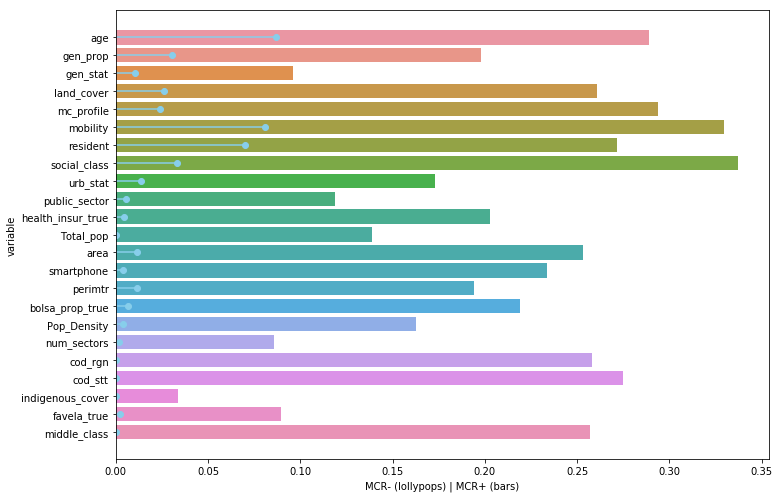

In [21]:
r1 = model.plot_mcr(X, y, feature_groups_of_interest = mcr_groupings, feature_names = grouping_names, num_times = 10, show_fig = True )

  0%|          | 0/23 [00:00<?, ?it/s]

 set_estimators(self, force_use = True, var_indexs = [55 56 57 58 59 60 61 62], debug = True )
Processing MCR+ groups of features.


  0%|          | 0/23 [00:00<?, ?it/s]

Processing MCR- groups of features.


100%|██████████| 23/23 [00:52<00:00,  2.30s/it]


MCR+ sum: 1.8454375117106991


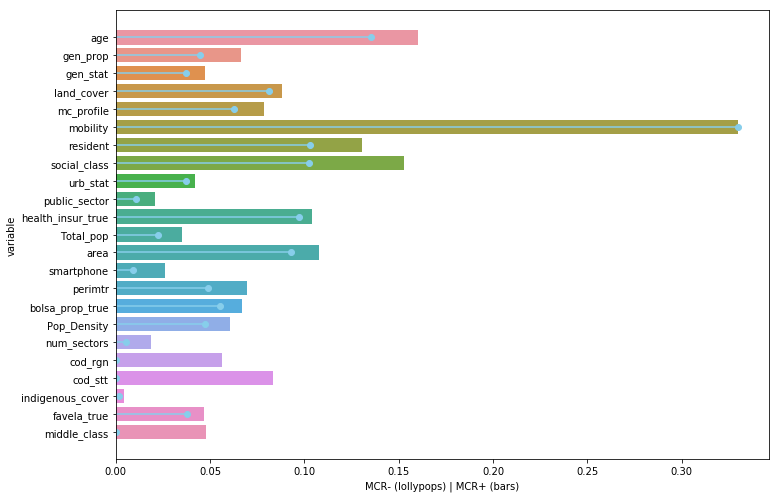

In [22]:
model.set_mcr_state(force_use = True, var_indexs = grouping_names2indexes['mobility'], debug = True )
r2 = model.plot_mcr(X, y, feature_groups_of_interest = mcr_groupings, feature_names = grouping_names, num_times = 10, show_fig = True )


  0%|          | 0/23 [00:00<?, ?it/s]

 set_estimators(self, force_use = True, var_indexs = [20 21 22 23 24 25 26 27 28 29], debug = True )
Processing MCR+ groups of features.


  0%|          | 0/23 [00:00<?, ?it/s]

Processing MCR- groups of features.


100%|██████████| 23/23 [00:54<00:00,  2.38s/it]


MCR+ sum: 1.6997564174629942


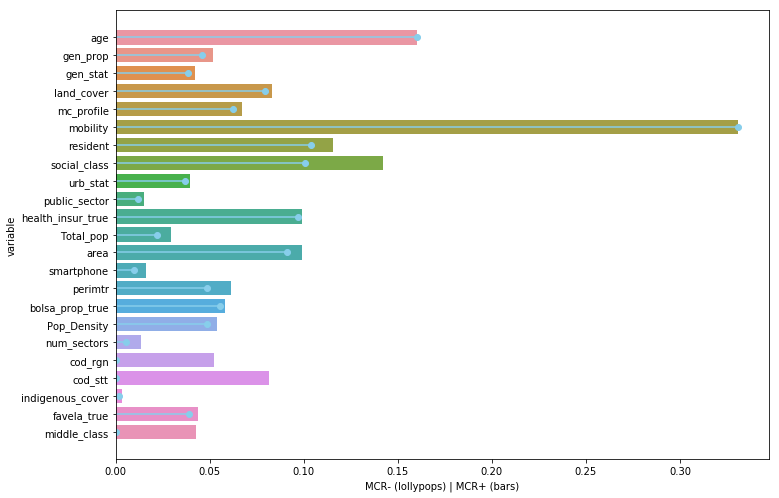

In [23]:
model.set_mcr_state(force_use = True, var_indexs = grouping_names2indexes['age'], debug = True )
r3 = model.plot_mcr(X, y, feature_groups_of_interest = mcr_groupings, feature_names = grouping_names, num_times = 10, show_fig = True )


  0%|          | 0/26 [00:00<?, ?it/s]

 set_estimators(self, force_use = True, var_indexs = [1], debug = True )
Processing MCR+ groups of features.


  0%|          | 0/26 [00:00<?, ?it/s]

Processing MCR- groups of features.


100%|██████████| 26/26 [01:06<00:00,  2.55s/it]


MCR+ sum: 1.8085628630316657


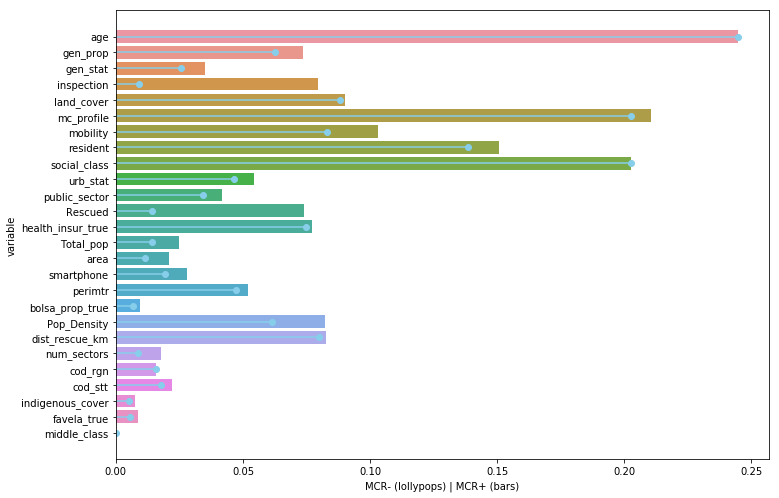

In [9]:
model.set_mcr_state(force_use = True, var_indexs = grouping_names2indexes['cod_rgn'], debug = True )
r4 = model.plot_mcr(X, y, feature_groups_of_interest = mcr_groupings, feature_names = grouping_names, num_times = 10, show_fig = True )


  0%|          | 0/26 [00:00<?, ?it/s]

 set_estimators(self, force_use = True, var_indexs = [13 14], debug = True )
Processing MCR+ groups of features.


  0%|          | 0/26 [00:00<?, ?it/s]

Processing MCR- groups of features.


100%|██████████| 26/26 [01:05<00:00,  2.52s/it]


MCR+ sum: 1.74746112047967


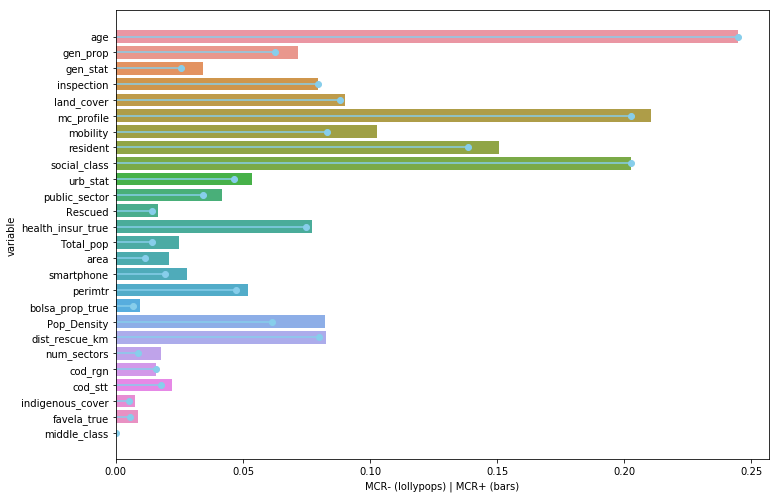

In [10]:
model.set_mcr_state(force_use = True, var_indexs = grouping_names2indexes['inspection'], debug = True )
r5 = model.plot_mcr(X, y, feature_groups_of_interest = mcr_groupings, feature_names = grouping_names, num_times = 10, show_fig = True )
